<a href="https://colab.research.google.com/github/satrio-hw/crostonTSB_deepdive/blob/main/Intermittent_Demand_Forecasting_(Crosston_TSB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demand Forcasting with Intermittent Dataset
## About
"Demand forecasting is a popular topic in industry, aimed at helping businesses make strategic decisions, particularly regarding procurement allocation. Traditionally, this has been done manually based on field observations. However, recently, machine learning approaches have gained prominence due to their superior performance in handling large volumes of data. Forecasting itself is a common problem to address using machine learning techniques.

The challenge lies in selecting the most suitable machine learning technique for a given dataset. The type of dataset is crucial, as machine learning methods often perform best with _"ideal"_ data conditions, which are rarely encountered in real-world scenarios. The conditions and assumptions made during data collection can significantly impact the _"ideality"_ of the data.

One common issue is intermittent data. By definition, intermittent data consists of demand history (typically found in transaction data) characterized by low variability in quantity but high variability in the time intervals between transactions. In other words, **_intermittent data occurs when the sales volume of a particular product is relatively stable, but the frequency of transactions for that product is highly sporadic._**

Direct forecasting using common machine learning approaches (such as XGBoost, ARIMA, etc.) may not be effective and may result in high errors. In such cases, the Croston's method can be implemented to address the challenges posed by intermittent datasets.

## Dataset Details
This project utilizes a synthetic dataset generated using the Python library `faker`. This dataset simulates real-life transaction data for 150 products categorized into three distinct groups: _"Electronics," "Hardware," and "Consumables"._

The dataset encompasses 5723 orders spanning the years 2022 to 2025 across nine different cities situated within four distinct regions: _"Java," "Sumatra," "Bali," and "Sulawesi"._

In [103]:
!pip install permetrics
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/assets/trx_dummy_mostly_intermittent.xlsx'
transaction_df = pd.read_excel(file_path)
display(transaction_df.sort_values(by='date'))

pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
transaction_df.info()
transaction_df.describe()

order_id costumer_id      product_id       date   price        city  \
161    ORD-162         U-8      7-Hardware 2022-01-22  260.64     Bandung   
160    ORD-161         U-8     21-Hardware 2022-01-30  154.20    Makassar   
2208  ORD-2209        U-97  35-Electronics 2022-02-04  436.30  Yogyakarta   
1619  ORD-1620        U-71     43-Hardware 2022-02-04  206.78    Denpasar   
137    ORD-138         U-7  30-Consumables 2022-02-05   33.38       Medan   
3972  ORD-3973       U-175     32-Hardware 2022-02-05   43.25  Yogyakarta   
3971  ORD-3972       U-175   1-Electronics 2022-02-08  140.22     Bandung   
1618  ORD-1619        U-71  46-Electronics 2022-02-09   88.92   Palembang   
3723  ORD-3724       U-164  14-Consumables 2022-02-09  218.60    Makassar   
5184  ORD-5185       U-227  23-Electronics 2022-02-11  459.86       Medan   
1716  ORD-1717        U-75  11-Electronics 2022-02-12  193.63   Palembang   
2868  ORD-2869       U-126  38-Electronics 2022-02-13  147.89    Denpasar   
2337  ORD-2338       U-102  44-Electronics 2022-02-13  216.39   Palembang   
5527  ORD-5528       U-242  48-Consumables 2022-02-14  318.89     Jakarta   
1544  ORD-1545        U-68  37-Electronics 2022-02-16  342.38    Denpasar   
77      ORD-78         U-4     44-Hardware 2022-02-16  231.41     Jakarta   
3970  ORD-3971       U-175     17-Hardware 2022-02-16  436.19    Surabaya   
279    ORD-280        U-13  15-Electronics 2022-02-18  437.34       Medan   
5183  ORD-5184       U-227     47-Hardware 2022-02-22  153.36     Bandung   
159    ORD-160         U-8  45-Consumables 2022-02-25  412.19       Medan   
790    ORD-791        U-35      6-Hardware 2022-02-25  389.57     Bandung   
860    ORD-861        U-38     32-Hardware 2022-02-27  273.45    Makassar   
3722  ORD-3723       U-164  28-Electronics 2022-02-28  412.07     Bandung   
136    ORD-137         U-7  20-Electronics 2022-02-28  461.70    Denpasar   
301    ORD-302        U-14  29-Electronics 2022-03-02  348.87    Makassar   
539    ORD-540        U-25  39-Consumables 2022-03-04  330.34    Makassar   
1594  ORD-1595        U-70     17-Hardware 2022-03-04  301.84    Denpasar   
2336  ORD-2337       U-102     49-Hardware 2022-03-05   76.51     Jakarta   
3213  ORD-3214       U-141   5-Electronics 2022-03-05  257.53  Yogyakarta   
3428  ORD-3429       U-151   6-Electronics 2022-03-06   56.21    Surabaya   
2597  ORD-2598       U-114      2-Hardware 2022-03-07  188.16   Palembang   
3969  ORD-3970       U-175     41-Hardware 2022-03-08   64.50    Makassar   
2490  ORD-2491       U-109  22-Electronics 2022-03-08  159.58     Bandung   
1644  ORD-1645        U-72     32-Hardware 2022-03-08  438.93       Medan   
930    ORD-931        U-41  33-Consumables 2022-03-10  390.16   Palembang   
2207  ORD-2208        U-97  15-Consumables 2022-03-10  369.88     Bandung   
3968  ORD-3969       U-175  50-Electronics 2022-03-11  174.01    Surabaya   
5326  ORD-5327       U-233  49-Electronics 2022-03-11  264.24    Semarang   
158    ORD-159         U-8  41-Electronics 2022-03-11   86.16     Jakarta   
2185  ORD-2186        U-96   2-Consumables 2022-03-14  269.37   Palembang   
2206  ORD-2207        U-97      8-Hardware 2022-03-15  468.73     Jakarta   
662    ORD-663        U-30  17-Consumables 2022-03-15  302.85    Makassar   
3496  ORD-3497       U-154     37-Hardware 2022-03-16  445.29    Makassar   
789    ORD-790        U-35  40-Consumables 2022-03-16  337.26     Jakarta   
5526  ORD-5527       U-242     29-Hardware 2022-03-16  231.27    Surabaya   
278    ORD-279        U-13  27-Electronics 2022-03-16  302.05       Medan   
3721  ORD-3722       U-164      1-Hardware 2022-03-18   63.58     Jakarta   
3212  ORD-3213       U-141     36-Hardware 2022-03-19  137.44    Semarang   
3101  ORD-3102       U-136  22-Electronics 2022-03-19  153.66  Yogyakarta   
2867  ORD-2868       U-126   6-Electronics 2022-03-20  324.87    Denpasar   
1617  ORD-1618        U-71  35-Electronics 2022-03-23  272.42  Yogyakarta   
48

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          5723 non-null   object        
 1   costumer_id       5723 non-null   object        
 2   product_id        5723 non-null   object        
 3   date              5723 non-null   datetime64[ns]
 4   price             5723 non-null   float64       
 5   city              5723 non-null   object        
 6   region            5723 non-null   object        
 7   product_category  5723 non-null   object        
 8   quantity          5723 non-null   int64         
 9   first_of_month    5723 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 447.2+ KB


date        price     quantity  \
count                           5723  5723.000000  5723.000000   
mean   2023-07-12 13:49:34.733531648   256.995361     5.898829   
...                              ...          ...          ...   
max              2025-01-07 00:00:00   499.900000    14.000000   
std                              NaN   142.028545     3.476903   

                      first_of_month  
count                           5723  
mean   2023-06-27 19:09:38.088415232  
...                              ...  
max              2025-01-01 00:00:00  
std                              NaN  

[8 rows x 4 columns]

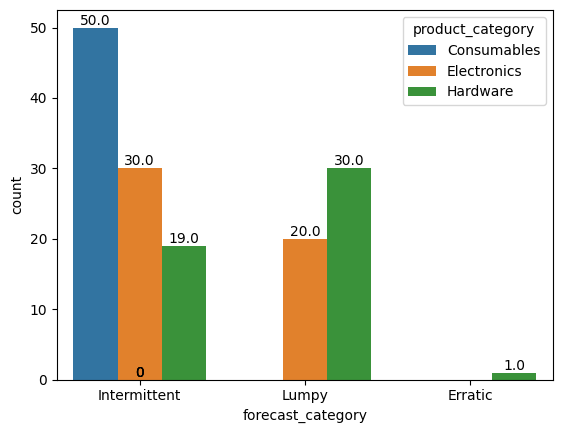

product_id       cv2       adi product_category forecast_category
0    23-Consumables  0.314952  1.636364      Consumables      Intermittent
1    29-Electronics  0.462767  1.440000      Electronics      Intermittent
2    30-Electronics  0.440768  1.714286      Electronics      Intermittent
3    13-Consumables  0.327918  1.714286      Consumables      Intermittent
4    41-Electronics  0.447387  1.800000      Electronics      Intermittent
..              ...       ...       ...              ...               ...
145  27-Consumables  0.343473  1.565217      Consumables      Intermittent
146  26-Electronics  0.424611  1.894737      Electronics      Intermittent
147   2-Electronics  0.524026  1.500000      Electronics             Lumpy
148  16-Electronics  0.501889  1.714286      Electronics             Lumpy
149      5-Hardware  0.547753  1.565217         Hardware             Lumpy

[150 rows x 5 columns]

In [44]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
def avg_demand_interval(df, product_id):
  df_temp = df.copy()

  product_data = df_temp[df_temp['product_id'] == product_id].sort_values('date')
  demand_bucket = len(product_data['first_of_month'].unique())
  last_overall_order = df_temp['first_of_month'].max()
  first_order_prod = product_data['first_of_month'].min()
  period = ((pd.to_datetime(last_overall_order).year - pd.to_datetime(first_order_prod).year) * 12)
  + ( pd.to_datetime(last_overall_order).month - pd.to_datetime(first_order_prod).month)
  adi = period/demand_bucket
  return adi

def categorize_products(df):
  conditions = [
      (df['cv2'] < 0.49) & (df['adi'] < 1.32), # Smooth
      (df['cv2'] < 0.49) & (df['adi'] >= 1.32), # Intermittent
      (df['cv2'] >= 0.49) & (df['adi'] < 1.32), # Erratic
      (df['cv2'] >= 0.49) & (df['adi'] >= 1.32), # Lumpy
  ]

  choices = ['Smooth', 'Intermittent', 'Erratic', 'Lumpy']
  df['forecast_category'] = np.select(conditions, choices, default='Unknown') # use np.select
  return df

cv2_ls, prod_id_ls, adi_ls = [[] for i in range(3)]
for prod in transaction_df['product_id'].unique():
  temp = transaction_df.iloc[:][transaction_df['product_id']==prod]
  cv2_quantity = temp['quantity'].std() / temp['quantity'].mean()
  cv2_ls.append(cv2_quantity)
  prod_id_ls.append(prod)
  adi_ls.append(avg_demand_interval(transaction_df,prod))
product_forecastable_df = pd.DataFrame({'product_id':prod_id_ls,'cv2':cv2_ls, 'adi':adi_ls})
product_forecastable_df['product_category'] = product_forecastable_df['product_id'].str.split('-',expand=True)[1]
product_forecastable_df = categorize_products(product_forecastable_df)
sns.countplot(x='forecast_category', hue='product_category', data=product_forecastable_df)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
plt.show()
product_forecastable_df

The graph above visualizes the classification of products based on their demand patterns, using Average Demand Interval (ADI) and the squared Coefficient of Variation (CV²) as key metrics. Here's some details regarding the data:

* **Data Characteristics:**

  * **ADI:** Measures the average time between orders for a specific product. Higher ADI indicates less frequent orders.
  * **CV²:** Represents the squared coefficient of variation, measuring the variability of order quantities. Higher CV² suggests greater fluctuations in order sizes.

* **Classification:**

  * **Intermittent Data:** 60% of products fall into this category, characterized by infrequent orders (high ADI) but relatively stable order quantities (low CV²).
  * **Lumpy Data:** 33% of products exhibit both irregular order intervals and significant fluctuations in order quantities.
  * **Eratic Data:** 1% of products fall into this category, which have regular order but unstable order quantities.

The majority of orders of intermittent product originate from the "Java" region. Intermittent demand patterns pose unique challenges for traditional forecasting methods. **_Techniques like Croston's method are often more suitable for accurately predicting demand in such cases._**

order_id costumer_id      product_id       date   price        city  \
0        ORD-1         U-1  23-Consumables 2024-03-19  267.36  Yogyakarta   
1        ORD-2         U-1  29-Electronics 2024-01-31   15.57  Yogyakarta   
...        ...         ...             ...        ...     ...         ...   
5721  ORD-5722       U-250   5-Consumables 2023-03-20  294.52     Jakarta   
5722  ORD-5723       U-250  14-Electronics 2023-02-27  413.31     Bandung   

     region product_category  quantity first_of_month forecast_category  
0      Java      Consumables        13     2024-03-01      Intermittent  
1      Java      Electronics         3     2024-01-01      Intermittent  
...     ...              ...       ...            ...               ...  
5721   Java      Consumables        10     2023-03-01      Intermittent  
5722   Java      Electronics         2     2023-02-01      Intermittent  

[3789 rows x 11 columns]

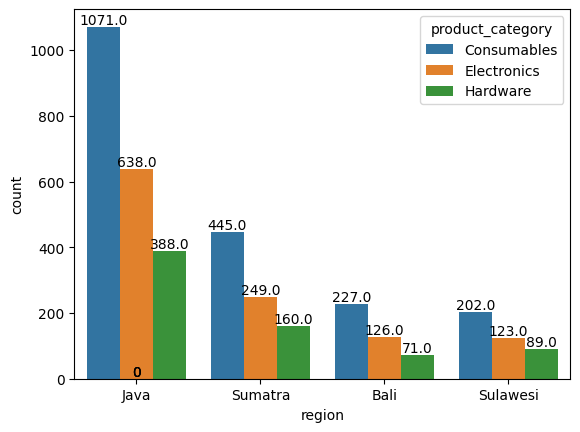

In [105]:
detail_trx_df = pd.merge(transaction_df, product_forecastable_df, on=['product_id','product_category'], how='left')
detail_trx_df = detail_trx_df.drop(columns=['cv2','adi'])
intermittent_df = detail_trx_df.iloc[:][detail_trx_df['forecast_category']=='Intermittent']
# sns.histplot(intermittent_df, x='region', hue='product_category')

sns.countplot(x='region', hue='product_category', data=intermittent_df)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
intermittent_df

## Forecasting (Croston TSB)
Croston TSB is one of the few methods that can be utilized to solve intermittent data problems. The principle behind Croston TSB involves implementing gradient smoothing using two different coefficients: alpha and beta.

These coefficients essentially correspond to the rise and/or fall of the forecasted value based on previous values. **_Alpha_** specifically corresponds to a level value, or the "absolute" forecasted demand, while **_beta_** corresponds to the probability of the forecasted demand value.

The final forecasted value is the multiplication of the probability and the level value, generated using the alpha and beta coefficients.

In [46]:
def Croston_TSB(ts, extra_periods=1, alpha=0.4, beta=0.4):
  d = np.array(ts) # Transform the input into a numpy array
  cols = len(d) # Historical period length
  d = np.append(d,[np.nan]*extra_periods) # Append np.nan into the demand array to cover future periods
  a,p,f = np.full((3,cols+extra_periods),np.nan) #level (a), probability(p) and forecast (f)

  # Initialization
  first_occurence = np.argmax(d[:cols]>0)
  a[0] = d[first_occurence]
  p[0] = 1/(1 + first_occurence)
  f[0] = p[0]*a[0]

  # Create all the t+1 forecasts
  for t in range(0,cols):
      if d[t] > 0:
          a[t+1] = alpha*d[t] + (1-alpha)*a[t]
          p[t+1] = beta*(1) + (1-beta)*p[t]
      else:
          a[t+1] = a[t]
          p[t+1] = (1-beta)*p[t]
      f[t+1] = p[t+1]*a[t+1]

  # Future Forecast
  a[cols+1:cols+extra_periods] = a[cols]
  p[cols+1:cols+extra_periods] = p[cols]
  f[cols+1:cols+extra_periods] = f[cols]

  df = pd.DataFrame.from_dict({"demand":d,"forecast":f,"period":p,"level":a,"error":d-f})
  return df

def tsbcroston_forecast(df, alpha=0.5, beta=0.5):
  result_by_key_ls, timeseries_ls = [[] for i in range(2)]
  for key in (df.product_id.unique().tolist()):
    temp = df.iloc[:][df['product_id']==key].copy()
    for reg in temp.region.unique().tolist():
      temp_reg = temp.iloc[:][temp['region']==reg]
      df_order = temp_reg.groupby(by=['first_of_month','region']).sum('quantity').reset_index()

      df_ts = df_order.copy()
      df_ts.index = pd.DatetimeIndex(df_order['first_of_month'], dayfirst = True)
      df_ts = df_ts.sort_index()
      df_ts = df_ts.reindex(pd.date_range(df_ts.index.min(), df_ts.index.max(), freq='MS'), fill_value = 0)
      df_ts = df_ts.loc[df_ts[(df_ts != 0)].first_valid_index():].drop(['first_of_month'], axis=1)
      df_ts['product_id'] = key
      df_ts['first_of_month'] = df_ts.index
      df_ts['region'] = reg
      df_ts = df_ts.reset_index().drop(columns=['index','price'])
      df_ts = df_ts[['first_of_month','product_id','region','quantity']]
      ts = df_ts['quantity'].copy(deep = True)
      ts.index = df_ts['first_of_month']

      result = Croston_TSB(ts)
      df_ts['forecast_cont'] = result.iloc[:-1].forecast.tolist()
      df_ts['forecast_rounded'] = np.round(result.iloc[:-1].forecast.tolist())
      add_row = pd.DataFrame({
        'first_of_month':[df_ts.first_of_month.max() + pd.DateOffset(months=1)],
        'product_id':[df_ts.product_id.unique().item()],
        'region':[df_ts.region.unique().item()],
        'quantity':[None],
        'forecast_cont':[result.iloc[-1].forecast.item()],
        'forecast_rounded':[round(result.iloc[-1].forecast.item())]
       })
      df_ts = pd.concat([df_ts,add_row])
      result_by_key_ls.append(df_ts)
    result_by_key = pd.concat(result_by_key_ls)
  return result_by_key

result_by_key = tsbcroston_forecast(intermittent_df)
result_by_key

first_of_month      product_id   region quantity  forecast_cont  \
0      2022-04-01  23-Consumables     Java       11      11.000000   
1      2022-05-01  23-Consumables     Java        0      11.000000   
2      2022-06-01  23-Consumables     Java        0       6.600000   
3      2022-07-01  23-Consumables     Java       13       3.960000   
4      2022-08-01  23-Consumables     Java        0       7.268800   
..            ...             ...      ...      ...            ...   
13     2023-12-01  26-Electronics  Sumatra        0       2.737103   
14     2024-01-01  26-Electronics  Sumatra        0       1.642262   
15     2024-02-01  26-Electronics  Sumatra        2       0.985357   
16     2024-03-01  26-Electronics  Sumatra        5       2.308298   
0      2024-04-01  26-Electronics  Sumatra     None       3.348582   

    forecast_rounded  
0               11.0  
1               11.0  
2                7.0  
3                4.0  
4                7.0  
..               ...  
13               3.0  
14               2.0  
15               1.0  
16               2.0  
0                3.0  

[8447 rows x 6 columns]

The results above show that the `quantity` column represents the actual demand, while the `forecast_cont` column represents the Croston TSB result. As we are trying to forecast demand for concrete products, the Croston TSB result values are rounded in the `forecast_rounded` column.

Product ID: 23-Consumables


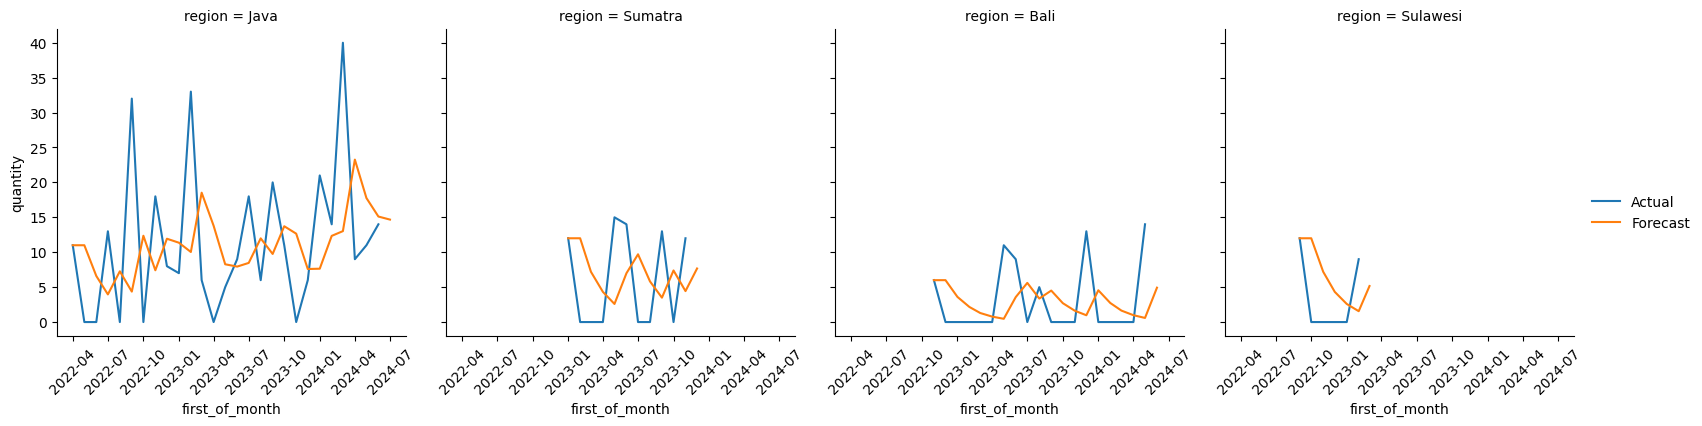

Product ID: 29-Electronics


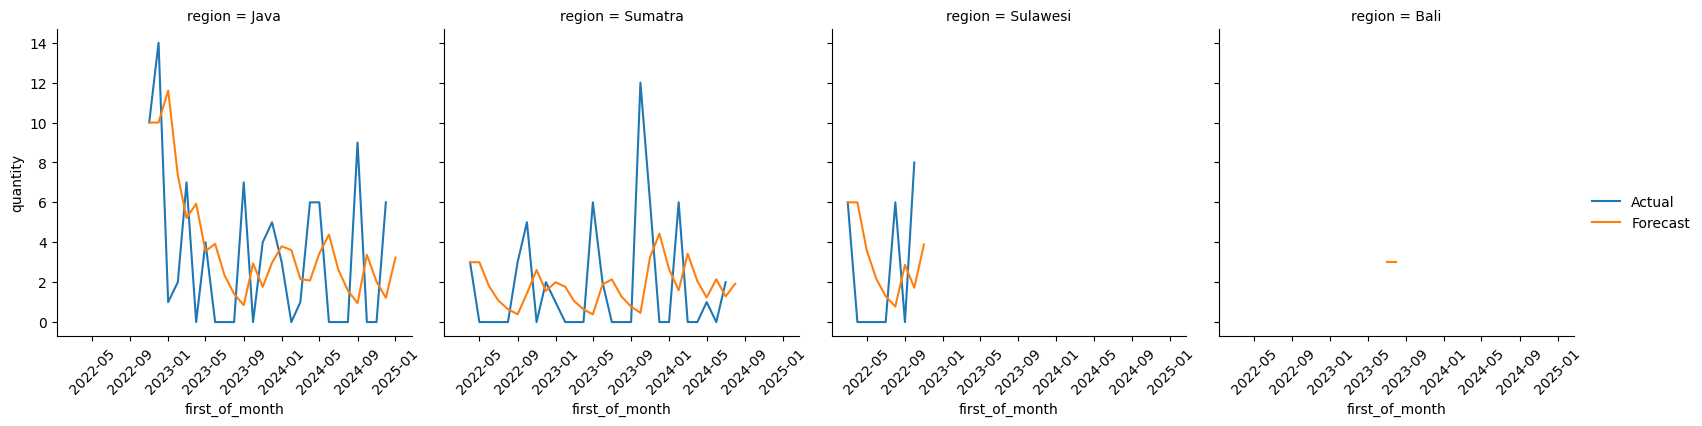

Product ID: 30-Electronics


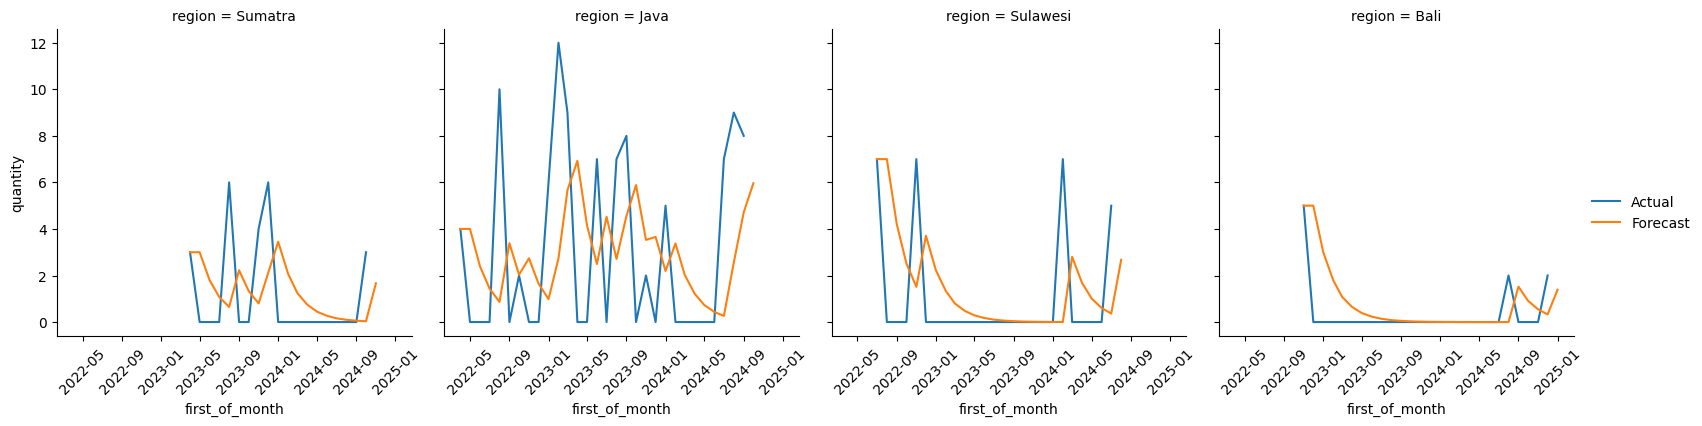

Product ID: 13-Consumables


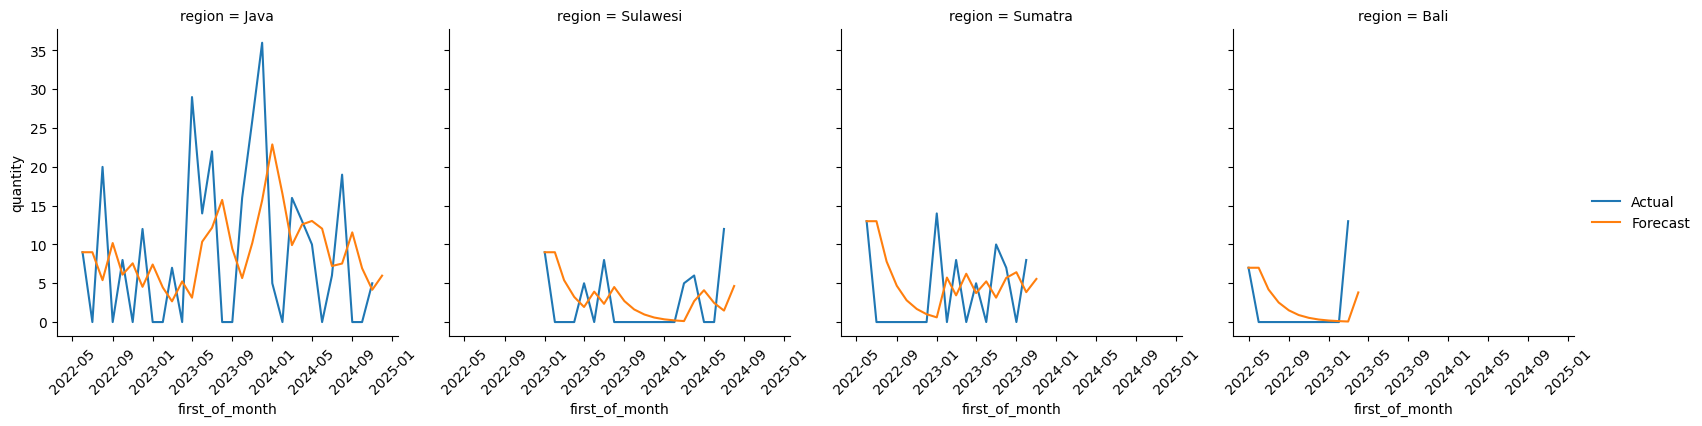

Product ID: 41-Electronics


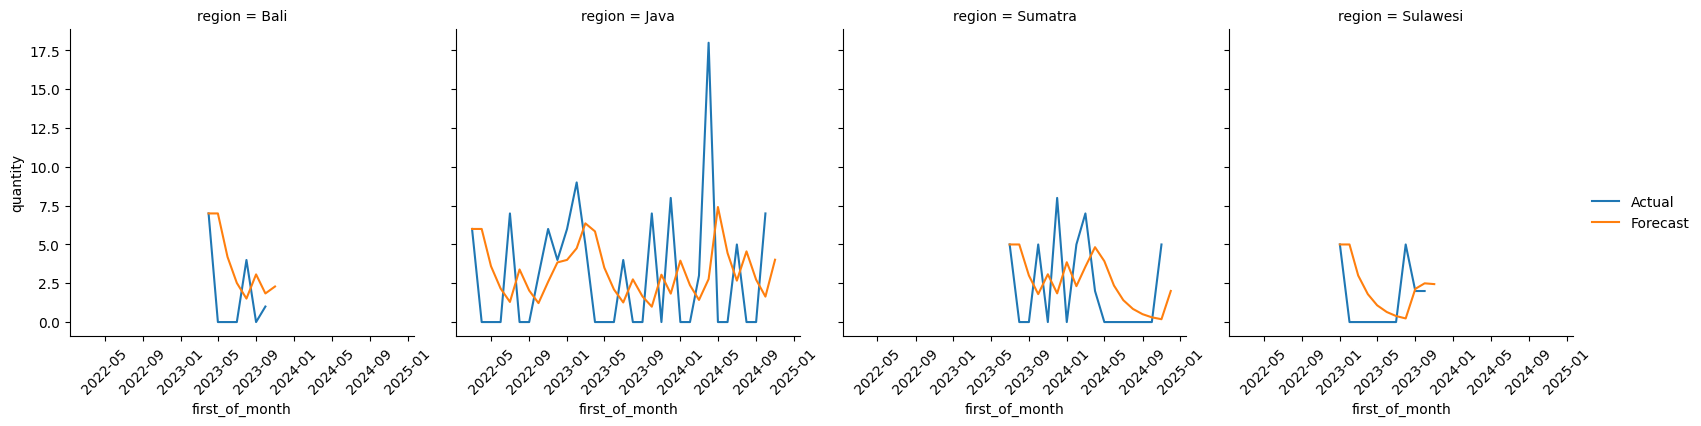

In [79]:
import warnings
warnings.filterwarnings("ignore")
i=0
for prod_id in result_by_key.product_id.unique().tolist():
  tmp_1 = result_by_key.iloc[:][result_by_key['product_id']==prod_id][['first_of_month','product_id','region','quantity']].copy()
  tmp_1['tag'] = 'Actual'
  tmp_2 = result_by_key.iloc[:][result_by_key['product_id']==prod_id][['first_of_month','product_id','region','forecast_cont']].copy()
  tmp_2 = tmp_2.rename(columns={'forecast_cont': 'quantity'})
  tmp_2['tag'] = 'Forecast'
  tmp = pd.concat([tmp_1,tmp_2])
  tmp = tmp.reset_index().drop(columns=['index'])
  print('Product ID: '+prod_id)
  g = sns.FacetGrid(tmp, col='region', height=4, aspect=1)
  g.map_dataframe(sns.lineplot, x='first_of_month', y='quantity', hue='tag')
  g.add_legend()
  for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
  plt.show()
  i+=1
  if i==5:
    break;

If we try to simulate a sample of products, the graph above shows that the trend between Actual and Forecast is quite aligned, despite fluctuations. For some products, if the actual demand is 0, the forecast will be adjusted to near zero gradually (for example, product 30-Electronics)

## Model Evaluation
To evaluate the forecast, we could use 2 metrics. First is Mean Arctangent Absolute Precentage Error (MAAPE) and Cumulative Forecasting Error (CFE).

### MAAPE
The Mean Absolute Percentage Error (MAPE) is a metric used to calculate the error by comparing the actual values to the forecasted values, even when the actual value is zero. It keeps the error value relatively stable (around 157%) in cases where no actual demand is found.

The MAPE value can rise to more than 100%, indicating that the difference between actual and forecast is so significant that it may be caused by different data assumptions or characteristics.

In [78]:
from permetrics.regression import RegressionMetric

prod_ls, region_ls, maape_ls, unforcastable_ls = [[] for i in range(4)]

for prod in result_by_key.product_id.unique().tolist():
  tmp = result_by_key.iloc[:][result_by_key['product_id']==prod].copy()
  for reg in tmp.region.unique().tolist():
    tmp_reg = tmp.iloc[:][(tmp['region']==reg)&(tmp['quantity']>=0)]
    if len(tmp_reg)<=2:
      unforcastable_ls.append(tmp_reg)
      pass;
    else:
      y_true = tmp_reg['quantity'].tolist()
      y_pred = tmp_reg['forecast_cont'].tolist()
      evaluator = RegressionMetric(y_true, y_pred)

      prod_ls.append(prod)
      region_ls.append(reg)
      maape_ls.append(evaluator.mean_arctangent_absolute_percentage_error())

maape_evaluation = pd.DataFrame({'product_id':prod_ls, 'region':region_ls, 'MAAPE':maape_ls})
pivot_maape_raw = maape_evaluation.pivot_table(index='region', columns='product_id', values='MAAPE')
pivot_maape = pivot_maape_raw.reset_index()

pivot_maape['avg_MAAPE'] = pivot_maape_raw.mean(axis=1).reset_index()[[0]]
display(pivot_maape)
unforcastable = pd.concat(unforcastable_ls)
pd.set_option('display.max_rows', None)
display(unforcastable.sort_values(by=['product_id', 'region']).reset_index().drop(columns='index'))
pd.set_option('display.max_rows', 5)

product_id    region  1-Consumables  10-Consumables  11-Consumables  \
0               Bali       1.284918        1.334723        1.456872   
1               Java       1.055919        0.802266        0.814934   
2           Sulawesi       1.330249        0.818924        1.346841   
3            Sumatra       1.225876        1.080555        1.223565   

product_id  12-Consumables  12-Electronics  13-Consumables  13-Hardware  \
0                 1.303493        1.198227        1.356350     1.204462   
1                 1.021359        0.989904        0.891907     1.087128   
2                 1.235392        1.435880        1.241014     1.372844   
3                 1.202327        1.218859        1.088246     1.292707   

product_id  14-Consumables  14-Electronics  14-Hardware  15-Consumables  \
0                 1.306961        1.222567     1.345252        1.334366   
1                 0.912000        0.889209     1.214385        0.921309   
2                 1.439889             NaN     1.405425        0.866136   
3                 1.272656        1.091267     1.109180        1.146806   

product_id  15-Electronics  15-Hardware  16-Consumables  17-Consumables  \
0                 1.371372     1.423526        1.269821        1.274910   
1                 0.824980     1.071353        0.735636        0.824048   
2                 1.343830     1.240484        1.338825        1.350595   
3                 1.276541     1.077413        1.357978        0.996519   

product_id  17-Electronics  17-Hardware  18-Consumables  18-Electronics  \
0                 1.318069     1.306818        1.140702        1.313465   
1                 0.958761     1.146802        0.986205        1.136249   
2                 1.402184     1.303253        1.295092        1.389491   
3                 1.257440     1.272481        1.115090        1.333979   

product_id  19-Consumables  19-Electronics  2-Consumables  2-Hardware  \
0                 1.237415        1.138605       1.213529    1.160605   
1                 0.877163        0.998930       0.934894    1.095914   
2                 1.324782        1.463696            NaN    1.247748   
3                 1.220719        1.265999       1.145371    1.256003   

product_id  20-Consumables  20-Hardware  21-Consumables  21-Electronics  \
0                 1.325210     1.318158        1.232674        1.078339   
1                 1.004812     1.116369        1.067310        0.923950   
2                      NaN     1.293012        1.338817        1.336037   
3                 1.174598     1.294482        1.192211        1.257942   

product_id  21-Hardware  22-Consumables  22-Electronics  23-Consumables  \
0              1.110836        1.164078        1.170577        1.239621   
1              0.796874        0.814539        0.673471        0.736393   
2              1.343192        1.158757        1.000034        1.162382   
3              1.308551        1.285862        1.362978        1.070369   

product_id  23-Electronics  24-Consumables  24-Electronics  24-Hardware  \
0                 1.272053        1.423503        1.404027     1.373233   
1                 0.973226        1.149951        1.005804     0.795166   
2                 1.319225        1.258046        1.332685     1.166567   
3                 1.308704        1.404221        1.235307     1.217921   

product_id  25-Consumables  26-Consumables  26-Electronics  27-Consumables  \
0                 1.404833        1.059871        1.125924        1.271518   
1                 1.044477        1.001138        0.896287        0.785062   
2                 1.338745             NaN        1.289208        1.318288   
3                 1.278673        1.277629        0.886610        1.279852   

product_id  27-Electronics  28-Consumables  28-Electronics  28-Hardware  \
0                 1.356263        0.949533        1.392487     1.307739   
1                 1.034179        1.045836        0.738131     0.942017   
2                 1.282983    

first_of_month      product_id    region quantity  forecast_cont  \
0      2024-06-01   2-Consumables  Sulawesi       10           10.0   
1      2022-09-01  20-Consumables  Sulawesi       11           11.0   
2      2024-01-01  26-Consumables  Sulawesi       10           10.0   
3      2023-07-01  29-Electronics      Bali        3            3.0   
4      2023-05-01  31-Electronics  Sulawesi        6            6.0   
5      2023-03-01  32-Consumables  Sulawesi        6            6.0   
6      2023-04-01     34-Hardware      Bali        4            4.0   
7      2022-10-01  36-Consumables  Sulawesi       25           25.0   
8      2022-07-01  37-Consumables      Bali        9            9.0   
9      2023-06-01   4-Consumables      Bali       12           12.0   
10     2022-07-01  41-Consumables  Sulawesi       13           13.0   
11     2024-03-01  42-Consumables  Sulawesi        7            7.0   
12     2023-11-01  43-Consumables  Sulawesi        6            6.0   
13     2022-02-01     43-Hardware      Bali        1            1.0   
14     2022-11-01     43-Hardware  Sulawesi        4            4.0   
15     2022-12-01     43-Hardware  Sulawesi        4            4.0   
16     2022-11-01  48-Electronics      Bali        1            1.0   
17     2022-12-01  48-Electronics      Bali        6            1.0   
18     2022-10-01  49-Consumables      Bali       13           13.0   
19     2023-07-01  49-Electronics  Sulawesi        6            6.0   
20     2022-04-01   5-Electronics      Bali        3            3.0   
21     2022-05-01   5-Electronics      Bali        2            3.0   
22     2023-12-01  50-Consumables  Sulawesi        9            9.0   
23     2023-02-01  50-Electronics   Sumatra        6            6.0   

    forecast_rounded  
0               10.0  
1               11.0  
2               10.0  
3                3.0  
4                6.0  
5                6.0  
6                4.0  
7               25.0  
8                9.0  
9               12.0  
10              13.0  
11               7.0  
12               6.0  
13               1.0  
14               4.0  
15               4.0  
16               1.0  
17               1.0  
18              13.0  
19               6.0  
20               3.0  
21               3.0  
22               9.0  
23               6.0

The table above shows that the MAAPE values for each region vary between approximately 95% and 120%, indicating that the difference between actual and forecasted values is relatively high.

We also identified 24 combinations of product and region that are unforecastable due to a lack of historical data.

### CFE
Sometimes, error and accuracy are not the most important metrics in demand forecasting. As the goal is to optimize the procurement process, it is also crucial to consider stock in model evaluation.

The CFE value provides a general picture of the product's stock condition at the end of the forecasting process, assuming the products are long-lasting. The assumptions underlying the CFE value are:


*   `CFE = 0` ; ideal condition, which all stocked product based on forecast are sold at the end.
*   `CFE > 0` ; indicates the underestimate model, describing the condition when the forecasted value < actual demand, which potentially leads to under-stock
*   `CFE < 0` ; indicates the overestimate model, describing the condition when the forecasted value > actual demand, which potentially leads to over-stock


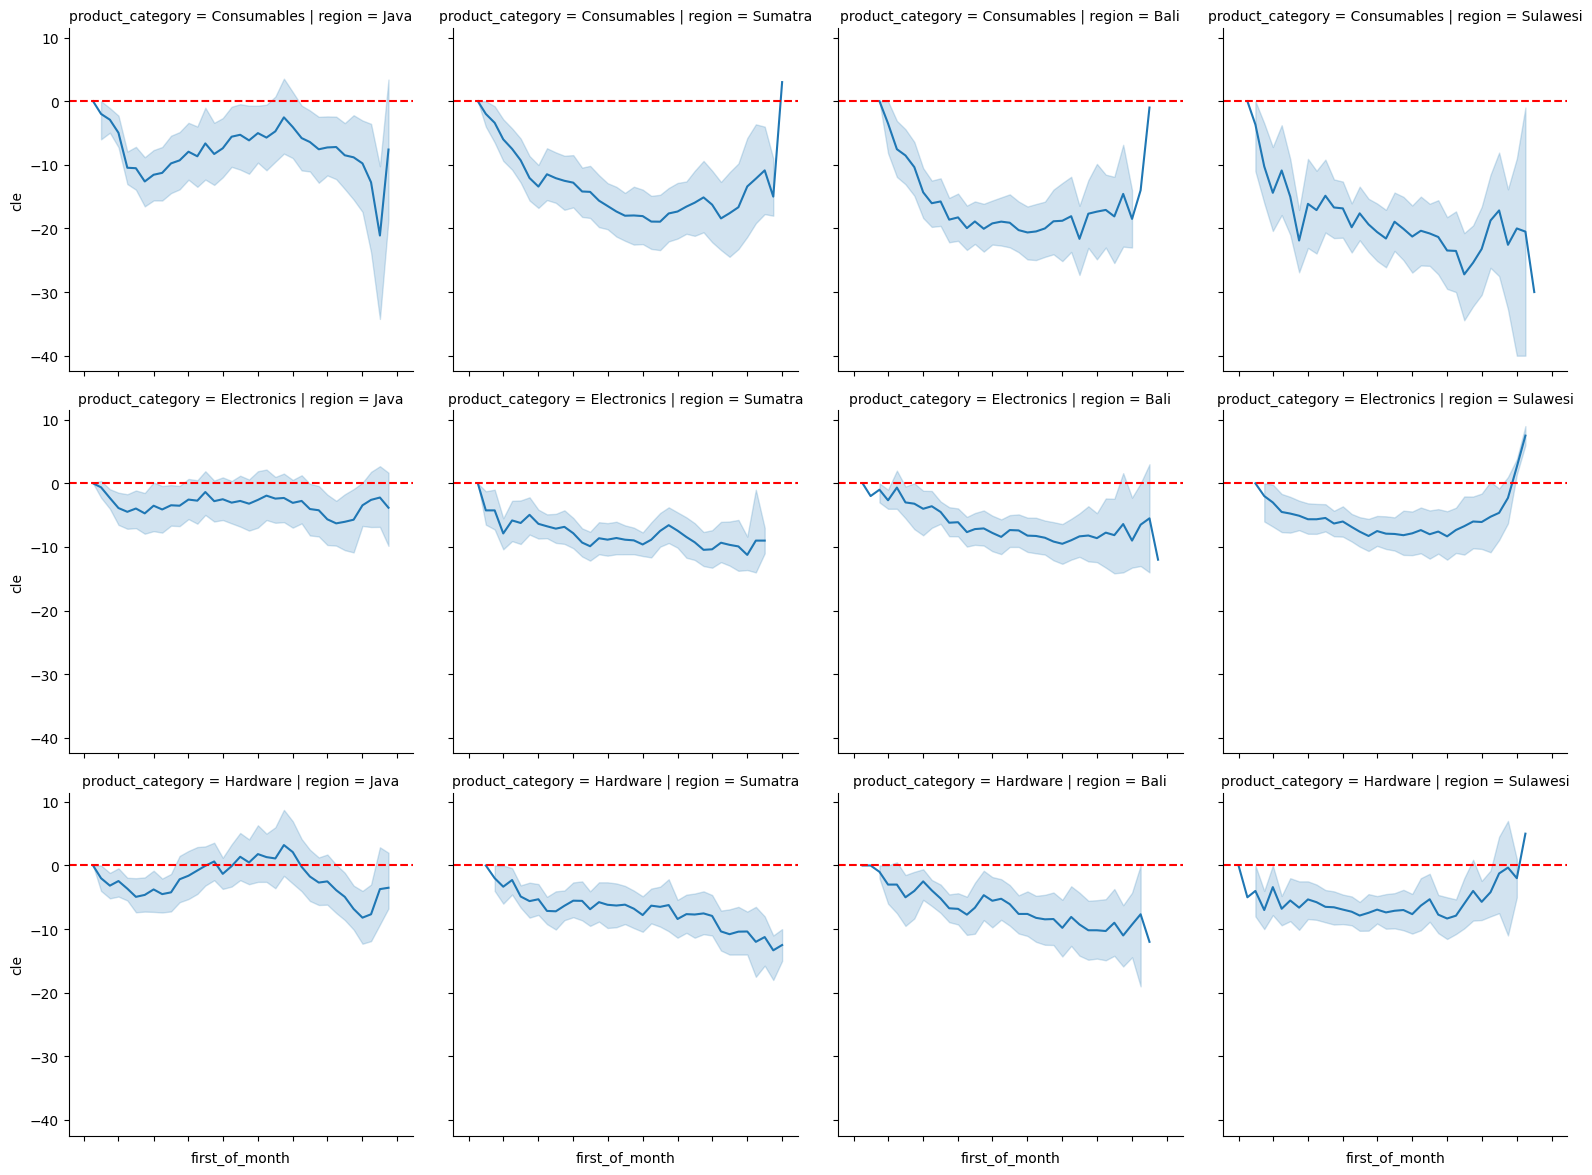

In [101]:
pd.set_option('display.max_rows', None)
cfe_ls = []

for prod in result_by_key.product_id.unique().tolist():
  tmp = result_by_key.iloc[:][result_by_key['product_id']==prod].copy()
  for reg in tmp.region.unique().tolist():
    tmp_reg = tmp.iloc[:][(tmp['region']==reg)&(tmp['quantity']>=0)]
    tmp_reg['forecast_error'] = tmp_reg['quantity'] - tmp_reg['forecast_rounded']
    tmp_reg['cle'] = tmp_reg['forecast_error'].cumsum()
    cfe_ls.append(tmp_reg)

cfe_df = pd.concat(cfe_ls)

cfe_df['product_category'] = cfe_df['product_id'].str.split('-',expand=True)[1]

g = sns.FacetGrid(cfe_df, col='region', row='product_category', height=4, aspect=1)
g.map_dataframe(sns.lineplot, x='first_of_month', y='cle')
for ax in g.axes.flat:
    ax.axhline(y=0, color='r', linestyle='--')
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

In our results, the CFE values generally show values below zero, **indicating that the forecasts tend to overestimate demand.** This can lead to over-stocking problems unless we can identify products as fast-moving. This requires further analysis.

## Concussion
Forecasting intermittent demand is a challenging problem. However, the Croston TSB method effectively addresses this challenge, particularly in capturing the trend of actual demand.

However, Croston is inherently limited to one-period-ahead forecasts due to its mathematical foundation. This limitation makes the **Croston TSB model an unsuitable choice for long-term forecasting.**

The forecasting results indicate that the model tends to overestimate demand, although it exhibits relatively stable performance in Java due to the high volume of transactions in that region.